In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [74]:
!pip install six
!pip install pydotplus
!pip install graphviz

In [31]:
!conda install six --yes
!conda install pydotplus --yes
!conda install graphviz --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/aletheadevelopmentteam/miniconda3/envs/env

  added / updated specs:
    - six


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.1.19  |       hecd8cb5_0         121 KB
    openssl-1.1.1j             |       h9ed2024_0         2.2 MB
    six-1.15.0                 |   py36hecd8cb5_0          27 KB
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following packages will be UPDATED:

  ca-certificates                      2020.12.8-hecd8cb5_0 --> 2021.1.19-hecd8cb5_0
  openssl                                 1.1.1i-h9ed2024_0 --> 1.1.1j-h9ed2024_0

The following packages will be SUPERSEDED by a higher-priority channel:

  six                conda-forge/noarch::six-1.15.0-pyh9f0~ --> pkgs/main/osx-64::six-1.1

In [32]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [33]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

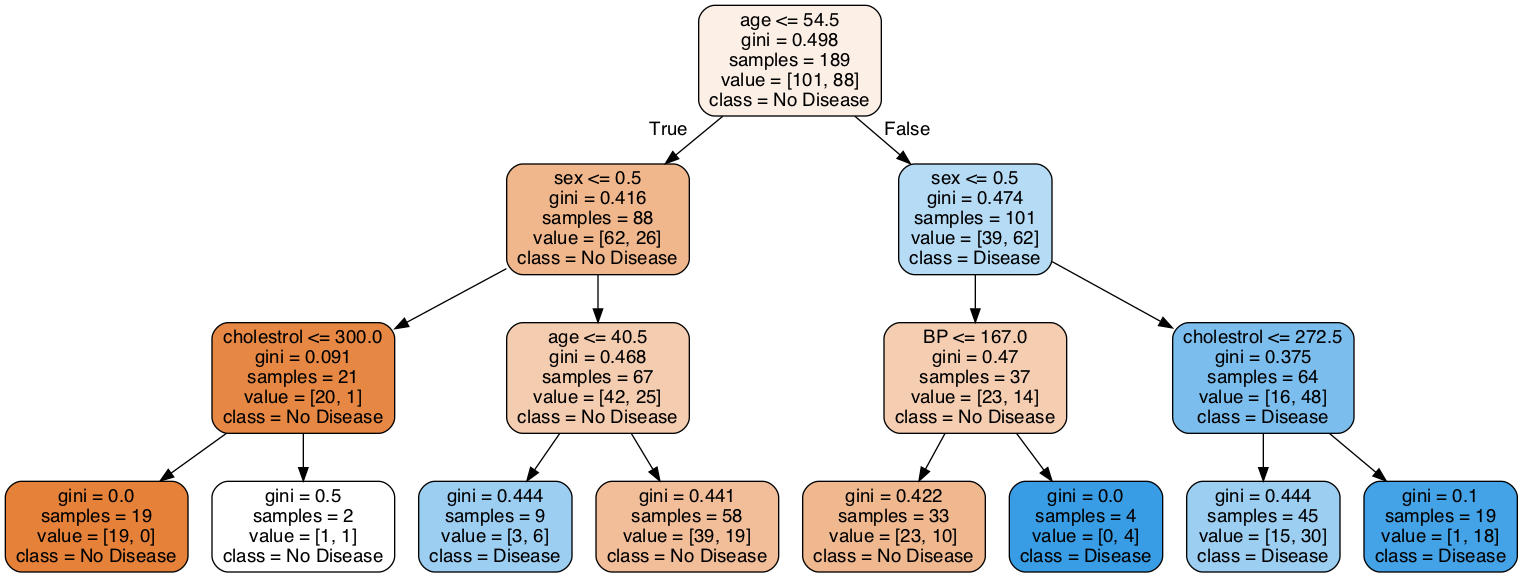

In [75]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
# graph.write_pdf("dt_heartdisease.pdf")

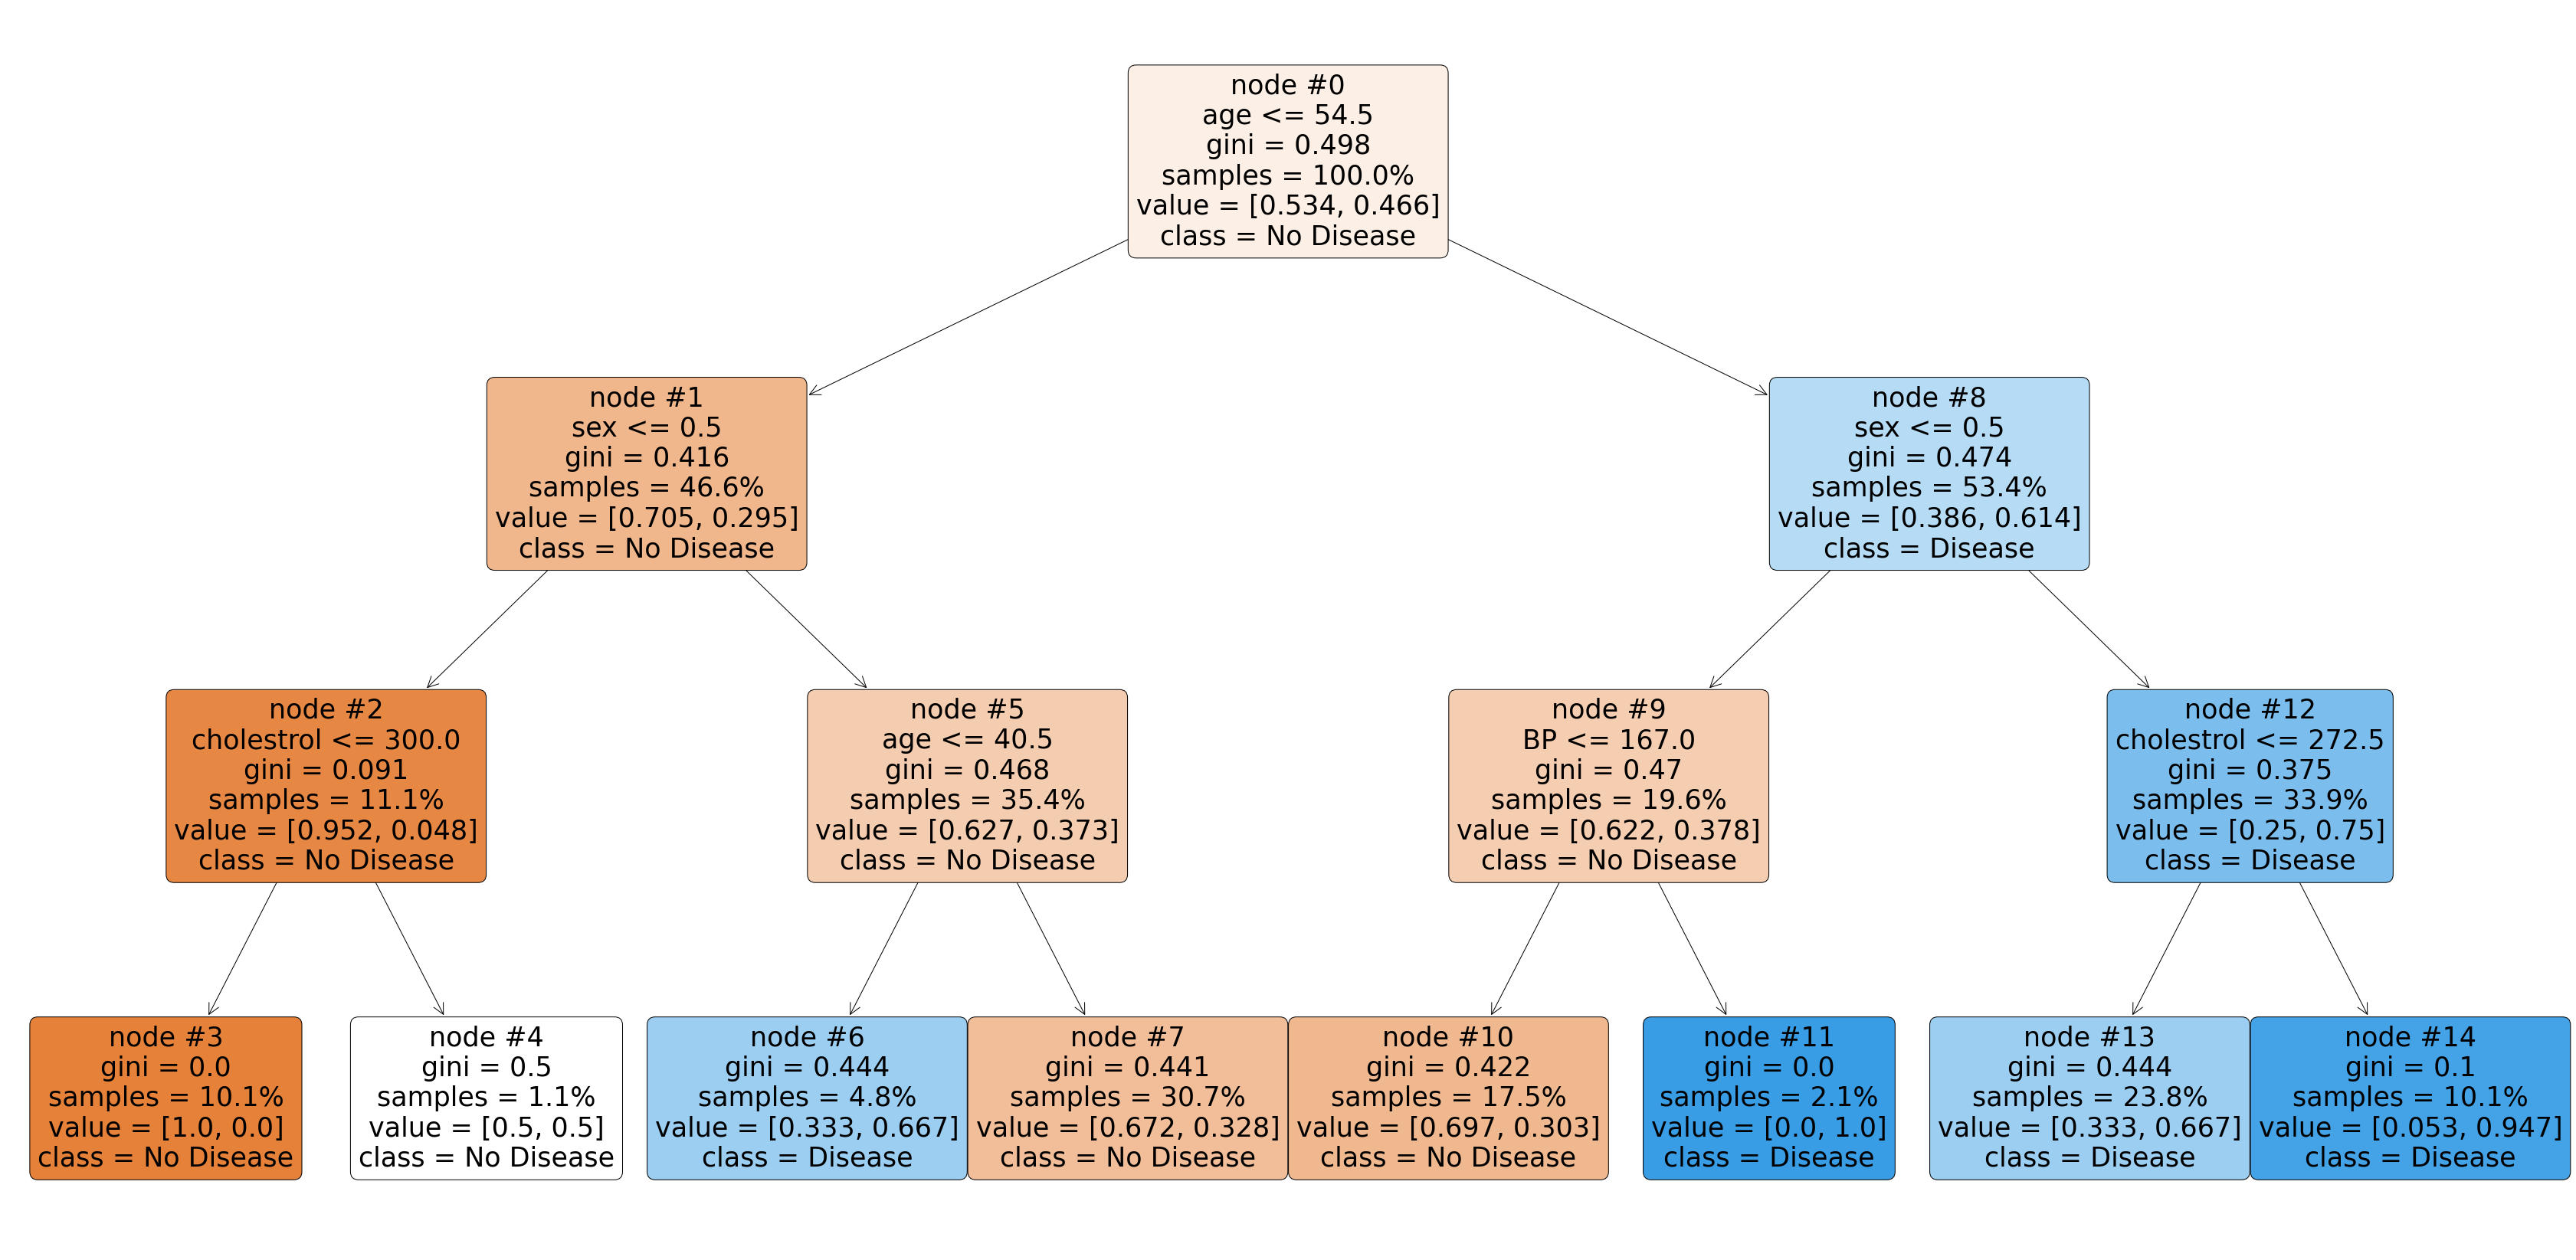

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True,rounded=True,
          node_ids=True,proportion=True);

#### Evaluating model performance

In [69]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8518518518518519


array([[91, 10],
       [18, 70]])

In [72]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.654320987654321


array([[33, 16],
       [12, 20]])